In [297]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')


In [298]:
# Reading data from excel file
ds = pd.read_excel('Agriculture.xlsx')
ds

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [299]:
# dropping the null values 
ds.dropna(inplace=True)

In [300]:
ds.shape

(4157, 10)

In [301]:
# Removing the duplicate rows from the dataset

print ('Shape of dataset before removing duplicates: ', ds.shape)
# Dropping the duplicate rows
ds = ds.drop_duplicates(keep='first')
print ('Shape of dataset after removing duplicates: ', ds.shape)

Shape of dataset before removing duplicates:  (4157, 10)
Shape of dataset after removing duplicates:  (4157, 10)


In [302]:
ds.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [303]:
# Checking the columns of the dataset
ds.shape


(4157, 10)

In [304]:
# Checking the columns of dataset
ds.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [305]:
# Checking teh data types of dataset
ds.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [306]:
# Checking the dataset columns information
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4157 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4157 non-null   object 
 1   Estimated_Insects_Count  4157 non-null   int64  
 2   Crop_Type                4157 non-null   int64  
 3   Soil_Type                4157 non-null   int64  
 4   Pesticide_Use_Category   4157 non-null   int64  
 5   Number_Doses_Week        4157 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4157 non-null   int64  
 8   Season                   4157 non-null   int64  
 9   Crop_Damage              4157 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 357.2+ KB


# Summarize the 'Crop_Damage' distribution

In [307]:
from collections import Counter

target = ds.values[:,-1]
counter = Counter(target)

for k, v in counter.items():
    per = v/len(target) * 100
    print ('Crop_Damage = %s, Count=%d, Percentage=%.3f%%' %(k, v, per) )

Crop_Damage = 0, Count=3465, Percentage=83.353%
Crop_Damage = 1, Count=588, Percentage=14.145%
Crop_Damage = 2, Count=104, Percentage=2.502%


In [308]:
# identifying the number columns
ds_int = ds.select_dtypes(include=['int64', 'int32'])
ds_int.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Quit',
       'Season', 'Crop_Damage'],
      dtype='object')

In [309]:
# identifying the category columns
ds_cat = ds.select_dtypes(include=['object'])
ds_cat.columns

Index(['ID'], dtype='object')

# Checking the unique values of columns of dataset

In [310]:
ds['Estimated_Insects_Count'].unique()

array([ 188,  209,  257,  342,  577,  731, 1132, 1575, 1785, 2138, 2401,
       2999, 3516, 3895, 4096,  150,  151,  168,  232,  231,  256,  283,
        312,  311,  375,  410,  448,  488,  489,  531,  626,  625,  677,
        732,  789,  790,  851,  915,  916,  984, 1056, 1212, 1296, 1297,
       1385, 1478, 1576, 1678, 1786, 1898, 2015, 2016, 2139, 2267, 2402,
       2542, 2541, 2688, 2687, 2840, 3164, 3165, 3336, 3337, 3702, 3896,
        169,  411,  850, 3515, 4097], dtype=int64)

In [311]:
ds['Crop_Type'].unique()

array([1, 0], dtype=int64)

In [312]:
ds['Soil_Type'].unique()

array([0, 1], dtype=int64)

In [313]:
ds['Pesticide_Use_Category'].unique()

array([1, 3, 2], dtype=int64)

In [314]:
ds['Number_Doses_Week'].unique()

array([ 0, 30, 40, 60, 20, 25, 45, 50, 15, 10,  5, 35, 70, 55, 80, 90, 85,
       65, 75, 95], dtype=int64)

In [315]:
ds['Number_Weeks_Used'].unique()

array([ 0., 26., 20., 15., 14., 19., 24.,  8., 23., 25., 28., 29., 22.,
       21., 17., 30., 35., 32., 27., 16., 31., 33., 34., 39., 38., 42.,
       40., 41., 36., 44., 37., 46., 45., 47., 43., 50., 10., 49., 53.,
       48., 51., 54., 52., 55., 56., 61., 18., 57., 62., 60., 63., 66.,
       59., 64., 13.,  7.,  5., 12.,  6.,  9., 58., 11., 65.])

In [316]:
ds['Number_Weeks_Quit'].unique()

array([ 0,  1,  4, 13,  3, 14,  6,  2, 12, 15,  9, 10,  8, 11,  7,  5, 17,
       18, 16, 20, 21, 19, 22, 24, 23, 27, 25, 28, 26, 29, 30, 33, 32, 36,
       37, 34, 31, 39, 44, 41, 35, 47, 46, 40, 42, 38, 43], dtype=int64)

In [317]:
ds['Season'].unique()

array([1, 2, 3], dtype=int64)

In [318]:
ds['Crop_Damage'].unique()

array([0, 1, 2], dtype=int64)

# Checking the count of 'Crop_Damage' based on different columns

In [319]:
ds.groupby(['Crop_Type'])['Crop_Damage'].count()

Crop_Type
0    3220
1     937
Name: Crop_Damage, dtype: int64

In [320]:
ds.groupby(['Soil_Type'])['Crop_Damage'].count()

Soil_Type
0    2181
1    1976
Name: Crop_Damage, dtype: int64

In [321]:
ds.groupby(['Pesticide_Use_Category'])['Crop_Damage'].count()

Pesticide_Use_Category
1      40
2    2904
3    1213
Name: Crop_Damage, dtype: int64

In [322]:
ds.groupby(['Number_Doses_Week'])['Crop_Damage'].count()

Number_Doses_Week
0       40
5      241
10     489
15     356
20    1098
25     242
30     517
35      89
40     586
45      48
50     155
55      11
60     221
65       3
70      16
75       1
80      34
85       4
90       5
95       1
Name: Crop_Damage, dtype: int64

In [323]:
ds.groupby(['Number_Weeks_Quit'])['Crop_Damage'].count()

Number_Weeks_Quit
0     1336
1      119
2      130
3      108
4      101
5      130
6      131
7      113
8      114
9      106
10     122
11     106
12     121
13     115
14     133
15     122
16      93
17      86
18      72
19      78
20     121
21      68
22      74
23      51
24      46
25      44
26      39
27      35
28      39
29      41
30      30
31      22
32      19
33      15
34      15
35      10
36       8
37      10
38       9
39       3
40       4
41       9
42       3
43       2
44       1
46       1
47       2
Name: Crop_Damage, dtype: int64

In [324]:
ds.groupby(['Season'])['Crop_Damage'].count()

Season
1    1258
2    2090
3     809
Name: Crop_Damage, dtype: int64

In [325]:
ds.shape

(4157, 10)

# Statistical Summary

In [326]:
ds.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000
mean,1368.286264,0.225403,0.475343,2.282175,26.528747,28.891027,9.293481,1.891989,0.191484
std,815.550890,0.417898,0.499452,0.471010,15.651629,12.586005,9.753605,0.696910,0.452663
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,732.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


From above summary, mean is greater than median , it seems that outliers are present in the dataset

In [327]:
ds.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [328]:
ds.isna().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

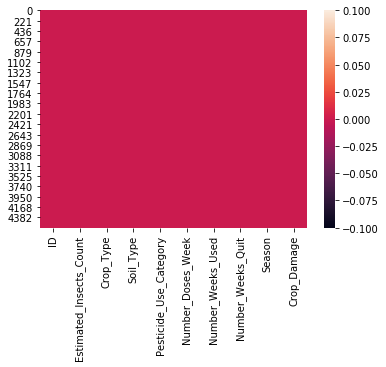

In [329]:
sns.heatmap(ds.isnull())

# Checking the corelation

In [330]:
ds.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.039040,-0.156353,-0.035732,-0.124894,0.449470,0.249871,-0.015429,0.196067
Crop_Type,-0.039040,1.000000,-0.174532,0.355242,-0.165631,-0.002237,-0.272315,0.001822,0.027448
Soil_Type,-0.156353,-0.174532,1.000000,0.020889,0.051378,-0.098399,-0.037584,0.003753,-0.057868
Pesticide_Use_Category,-0.035732,0.355242,0.020889,1.000000,-0.007122,0.387982,-0.570960,0.010773,0.202449
Number_Doses_Week,-0.124894,-0.165631,0.051378,-0.007122,1.000000,0.104022,-0.032430,-0.006366,-0.017724
Number_Weeks_Used,0.449470,-0.002237,-0.098399,0.387982,0.104022,1.000000,-0.467386,-0.011108,0.244988
Number_Weeks_Quit,0.249871,-0.272315,-0.037584,-0.570960,-0.032430,-0.467386,1.000000,0.002753,-0.155354
Season,-0.015429,0.001822,0.003753,0.010773,-0.006366,-0.011108,0.002753,1.000000,-0.016798
Crop_Damage,0.196067,0.027448,-0.057868,0.202449,-0.017724,0.244988,-0.155354,-0.016798,1.000000


Corelation through heatmap visualization

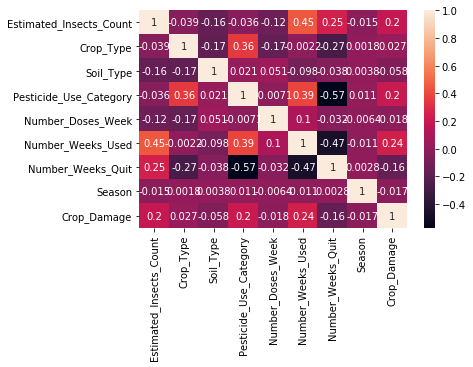

In [331]:
sns.heatmap(ds.corr(), annot=True)

# Countplots for features

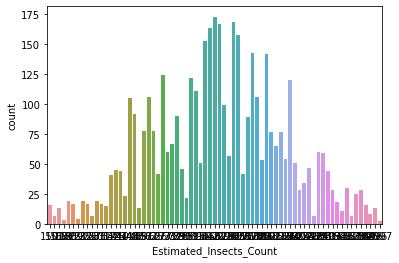

In [332]:
sns.countplot(ds['Estimated_Insects_Count'])
plt.show()

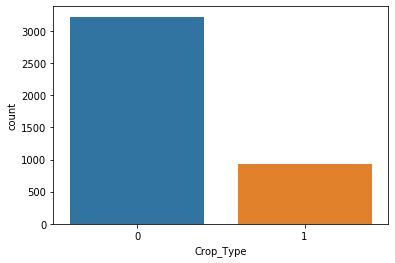

In [333]:
sns.countplot(ds['Crop_Type'])

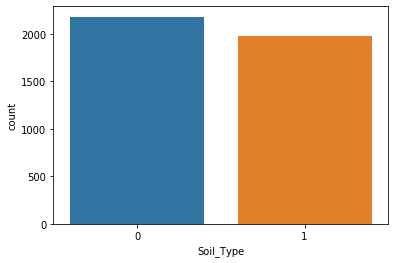

In [334]:
sns.countplot(ds['Soil_Type'])

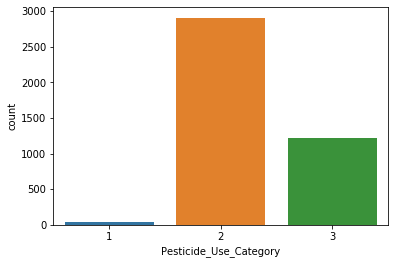

In [335]:
sns.countplot(ds['Pesticide_Use_Category'])

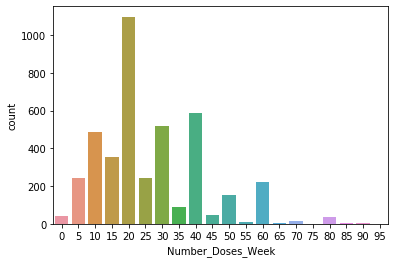

In [336]:
sns.countplot(ds['Number_Doses_Week'])

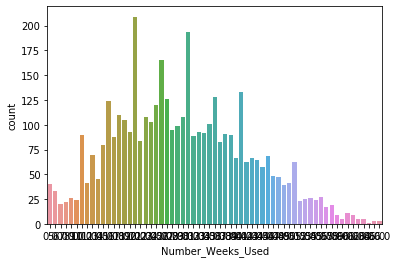

In [337]:
sns.countplot(ds['Number_Weeks_Used'])

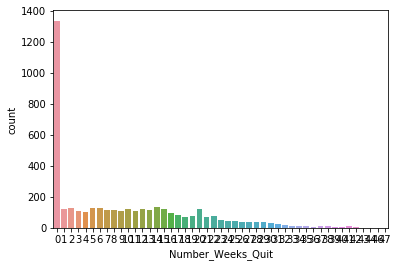

In [338]:
sns.countplot(ds['Number_Weeks_Quit'])

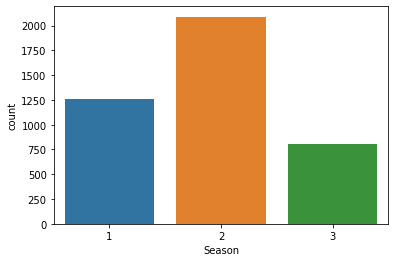

In [339]:
sns.countplot(ds['Season'])

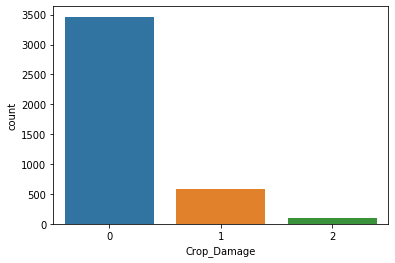

In [340]:
sns.countplot(ds['Crop_Damage'])

# PieChart

Piechart is used to represent the data in pie chart

([<matplotlib.patches.Wedge at 0x264104d1708>,
 [Text(-0.9529741772980002, 0.5493998702249572, '0'),
  Text(0.9068958153350033, -0.6225270918826423, '1'),
  Text(1.0966041846554155, -0.08636702030423092, '2')])

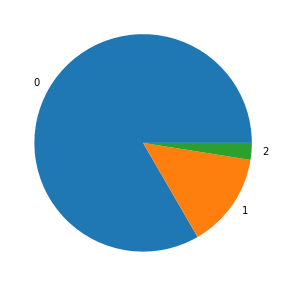

In [341]:
plt.figure(figsize=(10,5))
plt.pie(ds['Crop_Damage'].value_counts(), labels=ds.Crop_Damage.unique())

In [342]:
le = LabelEncoder()
ds['ID'] = le.fit_transform(ds['ID'])

In [343]:
ds.dtypes

ID                           int32
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

# Plotting Outliers

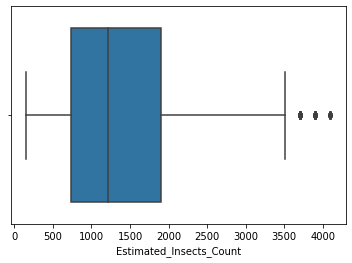

In [344]:
sns.boxplot(ds['Estimated_Insects_Count'])

In [345]:
collist = ds.columns.values
collist

array(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'], dtype=object)

In [346]:
nrows = 13
ncols = 13

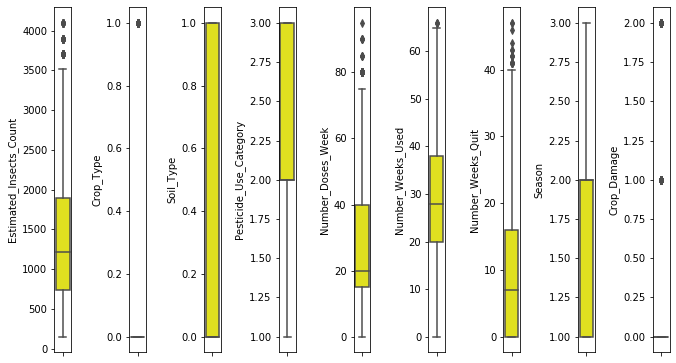

In [347]:
plt.figure(figsize=(ncols, 5*ncols))
for i in range(1, len(collist)):
    plt.subplot(nrows, ncols, i+1)
    sns.boxplot(ds[collist[i]], color='yellow', orient='v')
    plt.tight_layout()

# Distribution plots to check skewness of data

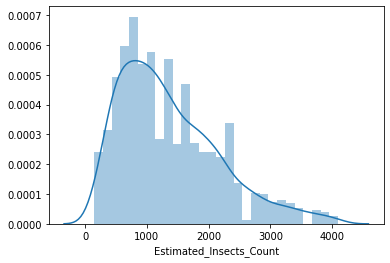

In [348]:
sns.distplot(ds['Estimated_Insects_Count'])

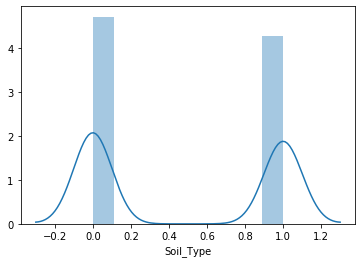

In [349]:
sns.distplot(ds['Soil_Type'])

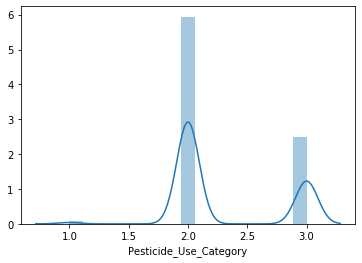

In [350]:
sns.distplot(ds['Pesticide_Use_Category'])

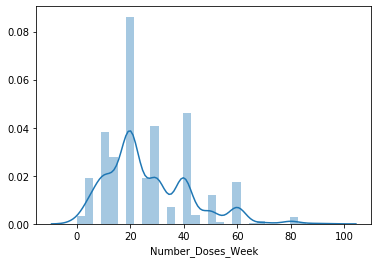

In [351]:
sns.distplot(ds['Number_Doses_Week'])

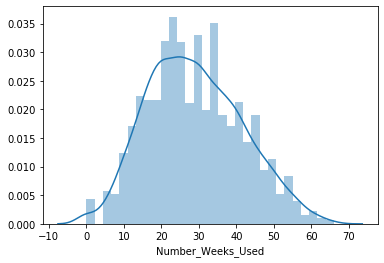

In [352]:
sns.distplot(ds['Number_Weeks_Used'])

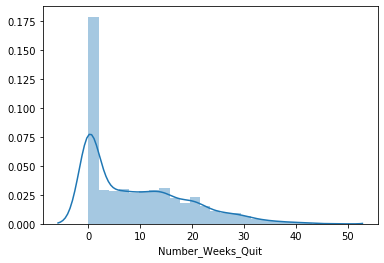

In [353]:
sns.distplot(ds['Number_Weeks_Quit'])

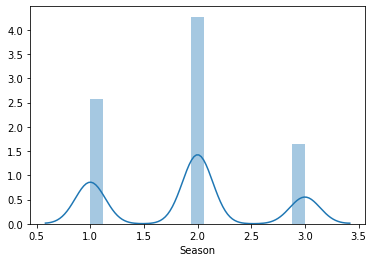

In [354]:
sns.distplot(ds['Season'])

# Violinplot

violinplots are used to represent comparison of a variable distribution (or sample distribution) 
across different 'categories'

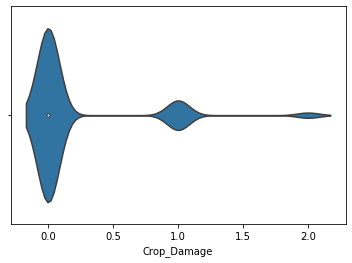

In [355]:
sns.violinplot(ds['Crop_Damage'])

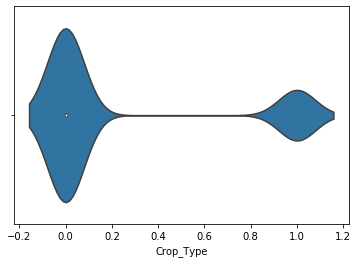

In [356]:
sns.violinplot(ds['Crop_Type'])

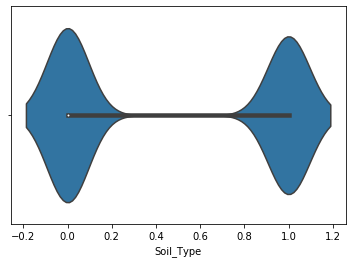

In [357]:
sns.violinplot(ds['Soil_Type'])

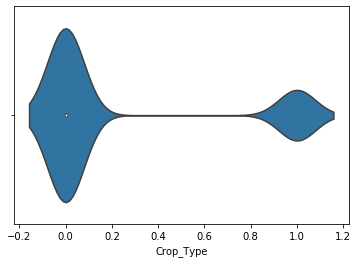

In [358]:
sns.violinplot(ds['Crop_Type'])

# Histograms

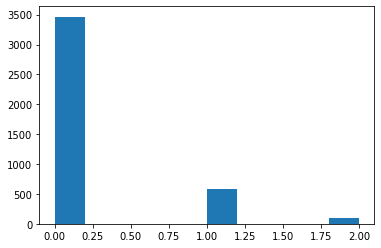

In [359]:
plt.hist(ds['Crop_Damage'])
plt.show()

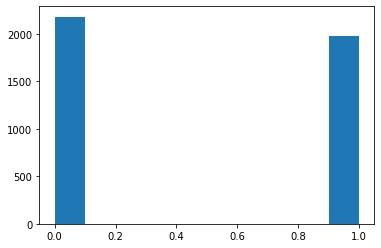

In [360]:
plt.hist(ds['Soil_Type'])
plt.show()

(array([3220.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         937.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

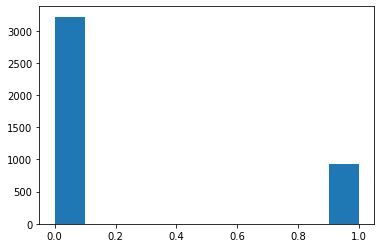

In [361]:
plt.hist(ds['Crop_Type'])

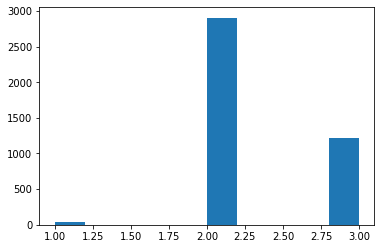

In [362]:
plt.hist(ds['Pesticide_Use_Category'])
plt.show()

# Bivariate Analysis

Swarmplot shows how two values vary with each other but the points are adjusted (only along the categorical axis)
so they don't overlap

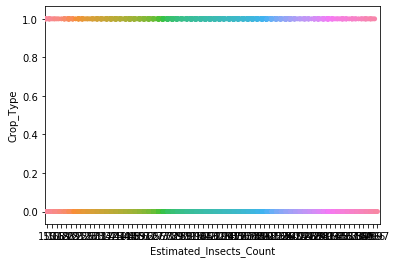

In [363]:
sns.swarmplot(x='Estimated_Insects_Count', y='Crop_Type', data=ds)

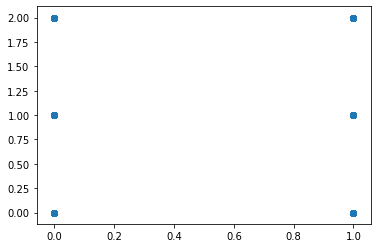

In [364]:
plt.scatter(ds['Crop_Type'], ds['Crop_Damage'])

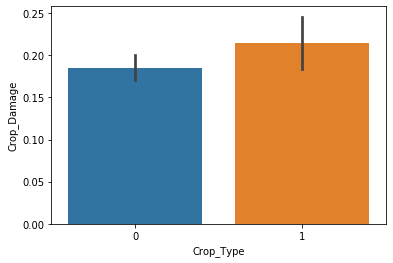

In [365]:
sns.barplot(x='Crop_Type', y='Crop_Damage', data=ds)

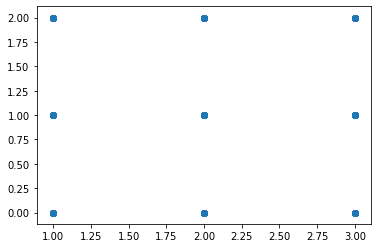

In [366]:
plt.scatter(ds['Season'], ds['Crop_Damage'])
plt.show()

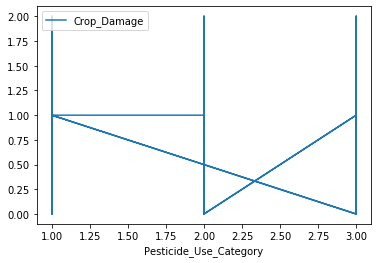

In [367]:
ds.plot(x='Pesticide_Use_Category', y='Crop_Damage', kind='line')
plt.show()

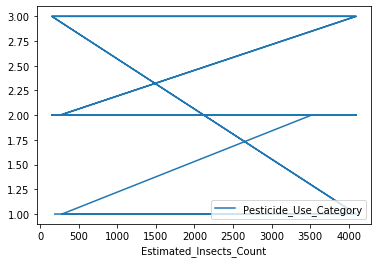

In [368]:
ds.plot(x='Estimated_Insects_Count', y='Pesticide_Use_Category', kind='line')
plt.show()

In [369]:
# Checking the 'z score' / outliers of the dataset, if present, will remove it
from scipy.stats import zscore
z_scr = abs(zscore(ds))
print ('Before removing zscore: ', ds.shape)

ds_final = ds.loc[(z_scr < 3).all(axis=1)]
print ("After removing zscore: ", ds_final.shape)

Before removing zscore:  (4157, 10)
After removing zscore:  (3949, 10)


In [370]:
ds_final.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,0,188,1,0,1,0,0.0,0,1,0
1,1,209,1,0,1,0,0.0,0,2,1
2,2,257,1,0,1,0,0.0,0,2,1
3,3,257,1,1,1,0,0.0,0,2,1
4,4,342,1,0,1,0,0.0,0,2,1


In [371]:
# Assigning the input and output data
df_x = ds_final.drop(columns = ['Crop_Damage'])
y = ds_final['Crop_Damage']

In [372]:
y.unique()

array([0, 1], dtype=int64)

In [373]:
ds_final.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,0,188,1,0,1,0,0.0,0,1,0
1,1,209,1,0,1,0,0.0,0,2,1
2,2,257,1,0,1,0,0.0,0,2,1
3,3,257,1,1,1,0,0.0,0,2,1
4,4,342,1,0,1,0,0.0,0,2,1


In [374]:
# StandardScaler is used to scale the data
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [375]:
x.skew()

ID                         0.001474
Estimated_Insects_Count    0.794630
Crop_Type                  1.306386
Soil_Type                  0.086718
Pesticide_Use_Category     0.766209
Number_Doses_Week          0.727243
Number_Weeks_Used          0.290171
Number_Weeks_Quit          0.810414
Season                     0.148595
dtype: float64

In [376]:
(x.shape, y.shape)

((3949, 9), (3949,))

In [377]:
y.unique()

array([0, 1], dtype=int64)

In [378]:
x.skew()

ID                         0.001474
Estimated_Insects_Count    0.794630
Crop_Type                  1.306386
Soil_Type                  0.086718
Pesticide_Use_Category     0.766209
Number_Doses_Week          0.727243
Number_Weeks_Used          0.290171
Number_Weeks_Quit          0.810414
Season                     0.148595
dtype: float64

In [379]:
# Remove skewness 
for col in x.columns:
    if x.skew().loc[col] > 0.55:
        x[col] = np.sqrt(x[col])

In [380]:
x.skew()

ID                         0.001474
Estimated_Insects_Count    0.191741
Crop_Type                  0.000000
Soil_Type                  0.086718
Pesticide_Use_Category     0.000000
Number_Doses_Week          0.303652
Number_Weeks_Used          0.290171
Number_Weeks_Quit          0.093237
Season                     0.148595
dtype: float64

In [381]:
x.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,-1.742193,NaN,1.359132,-0.957596,NaN,NaN,-2.311394,NaN,-1.279215
1,-1.741358,NaN,1.359132,-0.957596,NaN,NaN,-2.311394,NaN,0.152650
2,-1.740524,NaN,1.359132,-0.957596,NaN,NaN,-2.311394,NaN,0.152650
3,-1.739689,NaN,1.359132,1.044282,NaN,NaN,-2.311394,NaN,0.152650
4,-1.738854,NaN,1.359132,-0.957596,NaN,NaN,-2.311394,NaN,0.152650


In [382]:
x.replace(np.NaN, 0, inplace=True)

# Classification algorithm for dataset: with target column 'Crop_Damage'

In [383]:
# Subroutine to get the best random state with maximum accuracy score

def max_acu_score (regr, x, y):
    max_acu_score = 0
    for r_state in range (42, 100):

        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)

        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        acu_scr = accuracy_score(y_test, y_pred)


        #print ("\n accuracy score corresponding to state: ", r_state, " is: ", acu_scr)
        if (acu_scr > max_acu_score):
            max_acu_score = acu_scr
            final_r_state = r_state
    print ("\nMax accuracy score corresponding to ", final_r_state, " is: ", max_acu_score)
    return final_r_state

In [384]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [385]:
KNN = KNeighborsClassifier()
SV = SVC()
DT = DecisionTreeClassifier()
RFC = RandomForestClassifier()

In [386]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('DecisionTraeeClassifier', DT))
models.append(('RandomForestClassifier', RFC))

****************** KNeighborsClassifier *********************



Max accuracy score corresponding to  77  is:  0.8708860759493671
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Predicted values:  [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

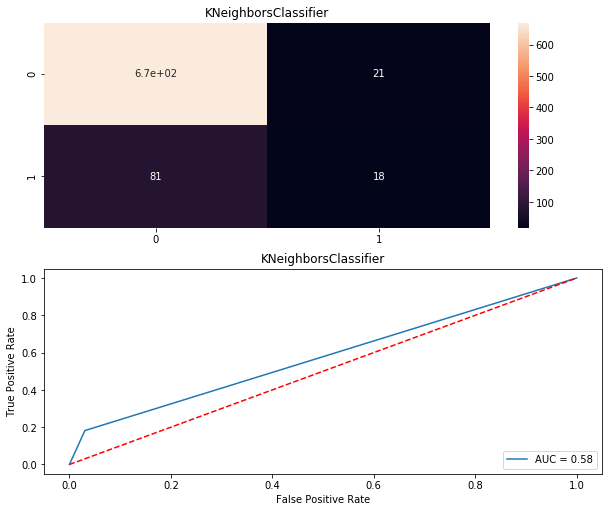

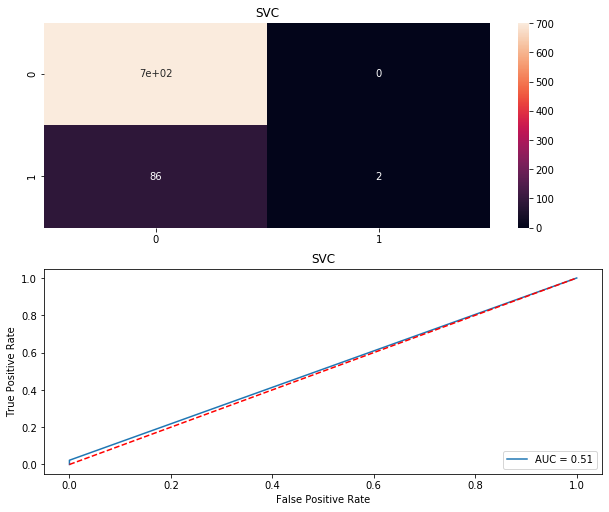

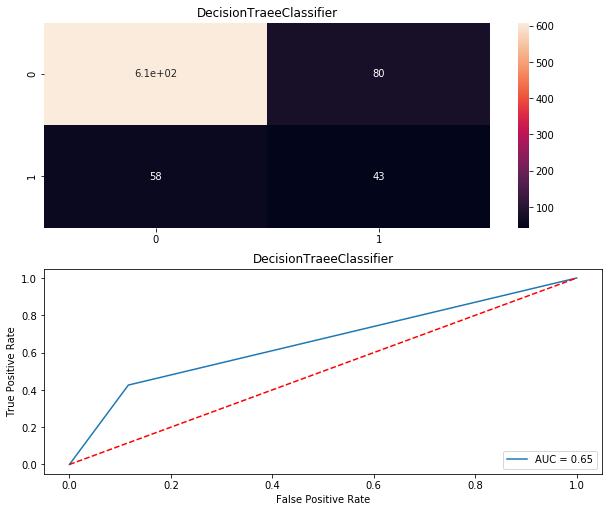

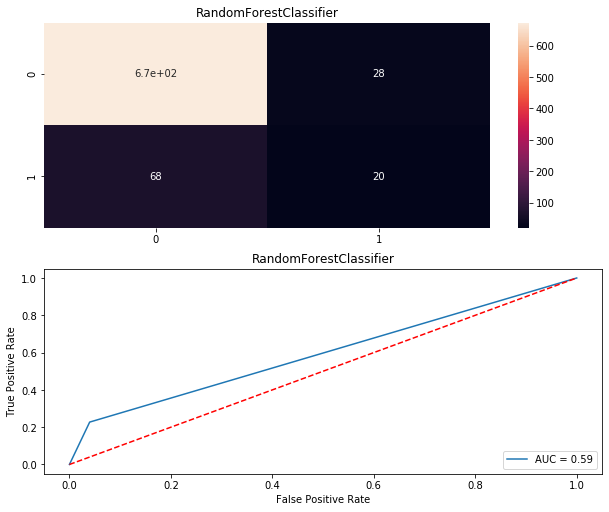

In [387]:
Model = []
score = []
cvs = []
rocscore = []
rstate = []

for name, model in models:    
    print ('******************', name , '*********************')
    print ("\n")
    
    model_state = max_acu_score(model, x, y)
    rstate.append(model_state)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = model_state, test_size = .20)
    
    Model.append(name)
    model.fit (x_train, y_train)
    print (model)
    
    pre = model.predict(x_test)
    print ("Predicted values: ", pre)
    print ('\n')
    
    AS = accuracy_score(y_test, pre)
    print ("Accuracy score: ", AS)
    score.append (AS*100)
    print ('\n')
    
    sc = cross_val_score(model, x, y, cv =10, scoring='accuracy').mean()
    print ("cross val score: ", sc)    
    cvs.append(sc*100)
    print ('\n')
    
    fpr, tpr, thresholds = roc_curve(y_test, pre, pos_label=1)
    print (fpr, tpr, thresholds)
    roc_auc = auc(fpr, tpr)
    print ("roc auc score: ", roc_auc)
    rocscore.append(roc_auc * 100)
    print ('\n')
    
    print ("classification report: ", classification_report (y_test, pre) )
    print ('\n')
    
    cm = confusion_matrix(y_test, pre)
    print (cm)
    print ('\n')
    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print (sns.heatmap(cm, annot=True))
     
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
    plt.plot ([0,1], [0,1], 'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print ('\n\n')

In [388]:
# Displaying teh data in tabular form
result = pd.DataFrame({'Model': Model, 'Accuracy_Score': score, 'Cross Val Score' : cvs, 'ROC_AUC_Curve': rocscore, 'RandomState': rstate })
result

,Model,Accuracy_Score,Cross Val Score,ROC_AUC_Curve,RandomState
0,KNeighborsClassifier,87.088608,64.755895,57.571372,77
1,SVC,89.113924,66.300199,51.136364,70
2,DecisionTraeeClassifier,82.531646,34.623980,65.481613,45
3,RandomForestClassifier,87.848101,41.793870,59.369334,70


In [389]:
# Using the best model for gridsearchcv 

# GridSearchCV 
parameters = { "C": [1, 10, 100, 500], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'linear', 'poly']}
gsc = GridSearchCV(estimator = SV, param_grid = parameters, cv=10)

In [390]:
gsc

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 500], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [391]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=70, test_size = 0.20)
svc = SVC(C=1.0, gamma='scale', kernel='rbf', )
svc.fit(x_train, y_train)
y_pred =  svc.predict(x_test)
print (y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

Best model is selected to determine te outcome of the harest season. i.e. whether the crop would be healthy (alive),
damaged by pesticides or damaged by other reasons.
(0 - alive, 1 - Damage due to other causes, 2 - Damage due to pesticides)

In [392]:
# Saving the predicted values in csv files
dft = pd.DataFrame(y_pred)
dft.to_csv ('pred_agri.csv')

accuracy score:  0.8911392405063291
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       702
           1       1.00      0.02      0.04        88

    accuracy                           0.89       790
   macro avg       0.95      0.51      0.49       790
weighted avg       0.90      0.89      0.84       790

Confusion_matrix:  [[702   0]
 [ 86   2]]
cross val score:  0.6630019919038745
roc auc score:  0.5113636363636364
AxesSubplot(0.125,0.808774;0.62x0.0712264)





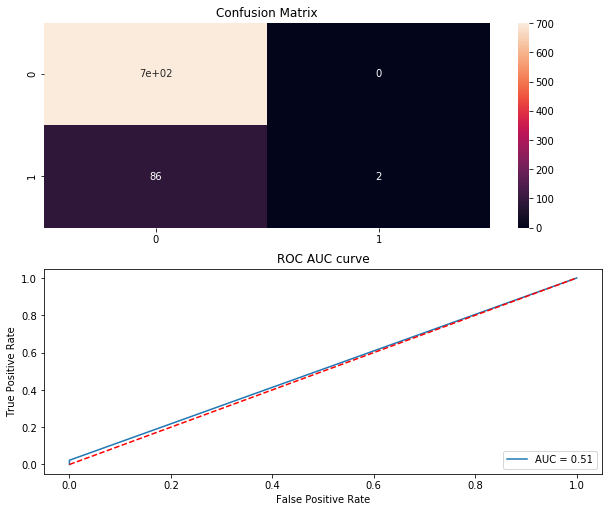

In [393]:
print ("accuracy score: ", accuracy_score(y_test, y_pred))
print ("Classification Report : \n", classification_report (y_test, y_pred))
print ("Confusion_matrix: ", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

sc = cross_val_score(svc, x, y, cv =10, scoring='accuracy').mean()
print ("cross val score: ", sc)    

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
print ("roc auc score: ", roc_auc)
   
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title("Confusion Matrix")
print (sns.heatmap(cm, annot=True))
     
plt.subplot(912)
plt.title("ROC AUC curve")
plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
plt.plot ([0,1], [0,1], 'r--')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print ('\n\n')

In [394]:
# saving the model 

from sklearn.externals import joblib
joblib.dump(svc, 'agriculture.pkl')
#clf = joblib.load('agriculture.pkl')
#clf.predict(x_test)

['agriculture.pkl']